# Importing Common and Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import sweetviz as sv

## Importing dataset 

In [2]:
df = pd.read_csv(r"MELBOURNE_HOUSE_PRICES_LESS.csv")

In [3]:
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
5,Airport West,4/32 Earl St,2,t,530000.0,S,Jellis,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
6,Airport West,3/74 Hawker St,2,u,540000.0,S,Barry,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
7,Airport West,1/26 Highridge Cr,3,h,715000.0,SP,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
8,Albanvale,1 Jackson Cct,6,h,NaN,PI,hockingstuart,1/04/2017,3021,Western Metropolitan,1899,14.0,Brimbank City Council
9,Albert Park,18 Mills St,3,h,1925000.0,S,Cayzer,1/04/2017,3206,Southern Metropolitan,3280,3.0,Port Phillip City Council


#### percentage of null data per column 

In [4]:
df.isnull().sum()/df.shape[0]*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            23.150278
Method            0.000000
SellerG           0.000000
Date              0.000000
Postcode          0.000000
Regionname        0.000000
Propertycount     0.000000
Distance          0.000000
CouncilArea       0.000000
dtype: float64

### Stats about  data 

                                             |          | [  0%]   00:00 -> (? left)


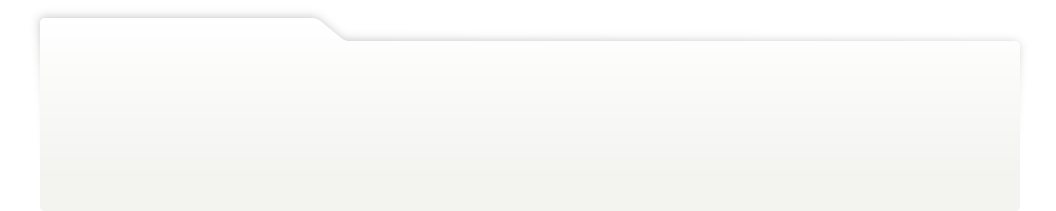
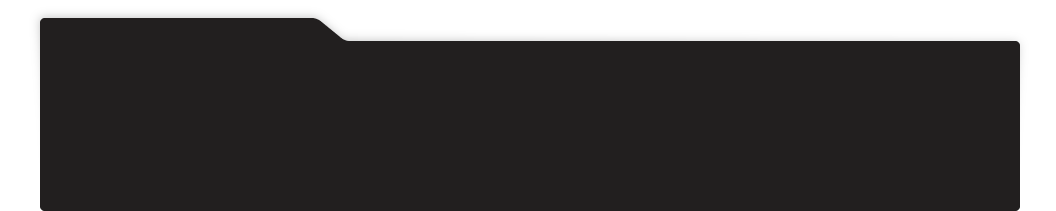
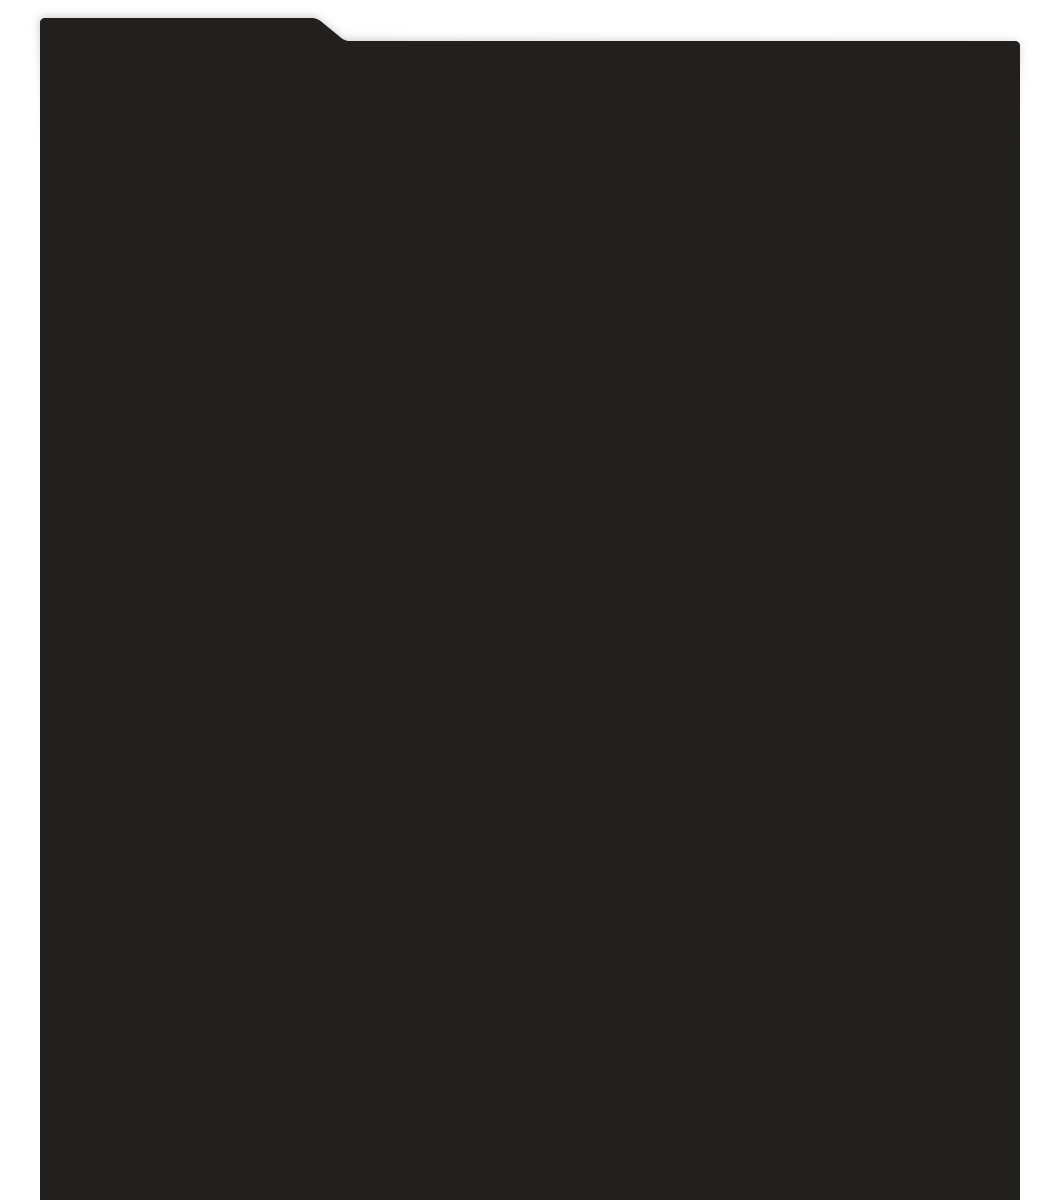
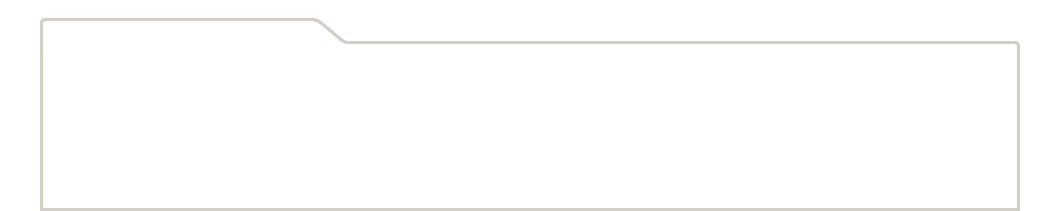
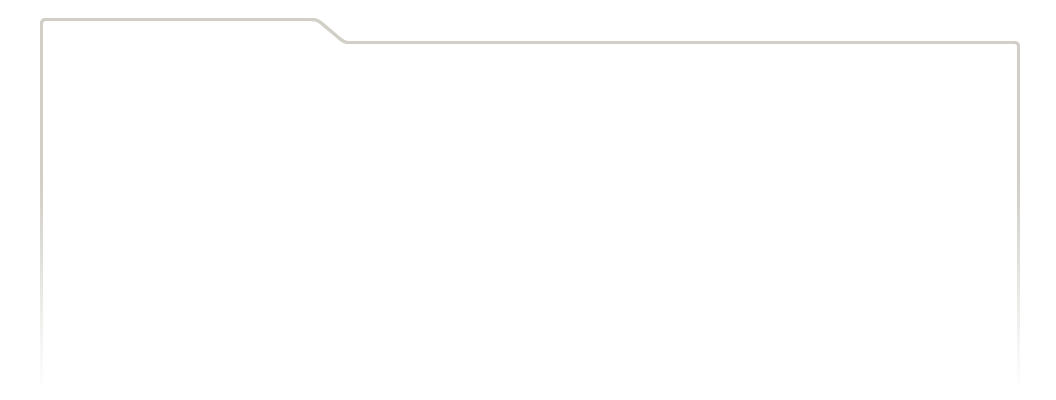
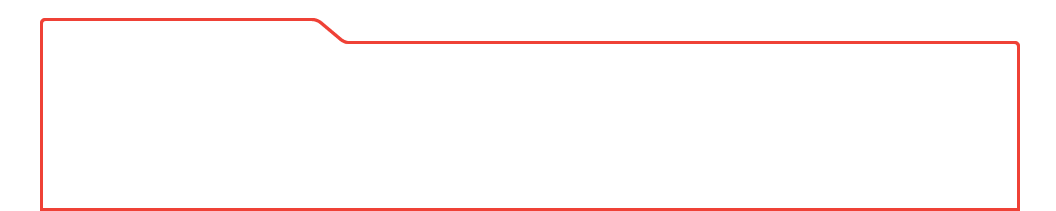
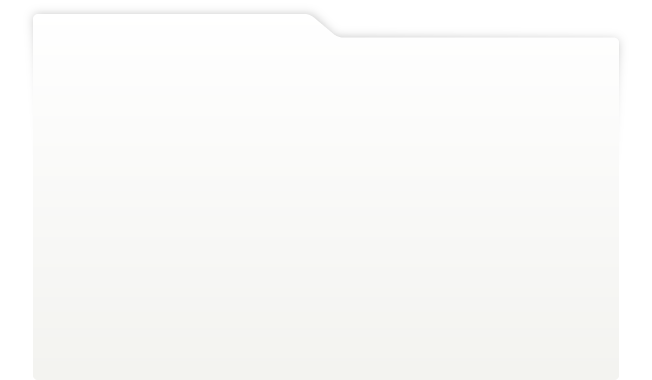
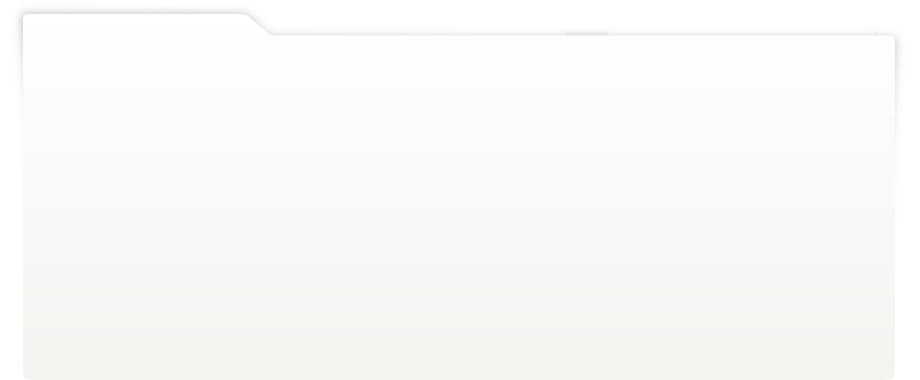
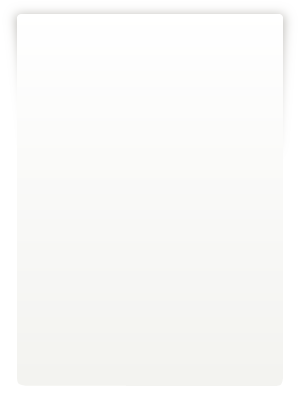
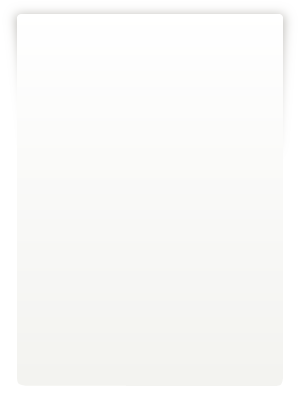
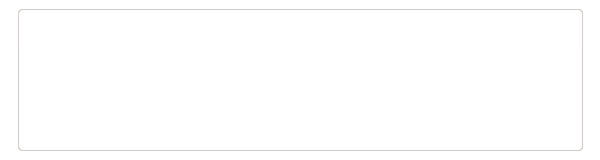
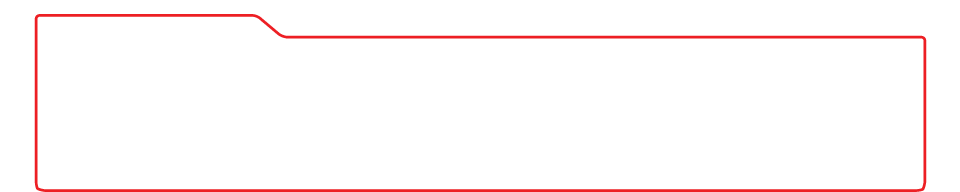
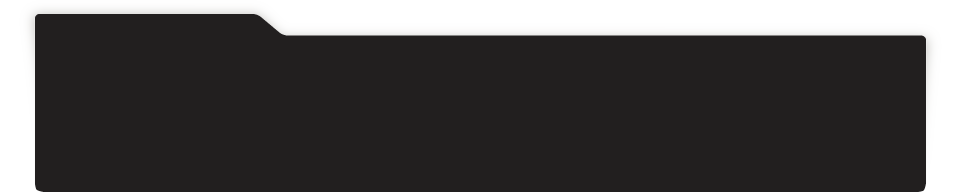
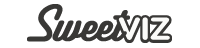
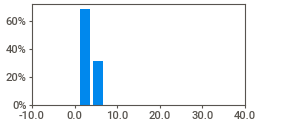
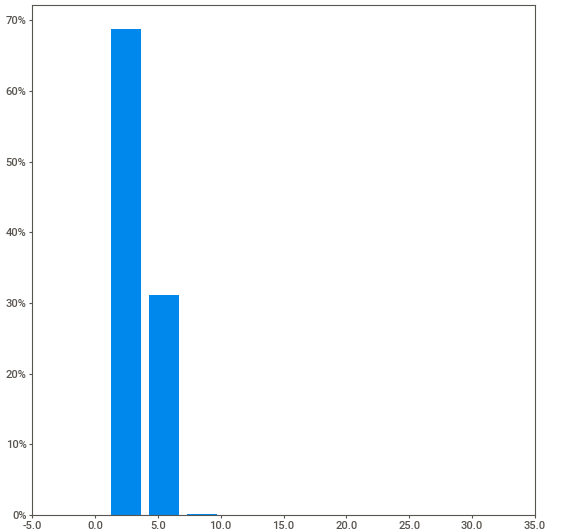
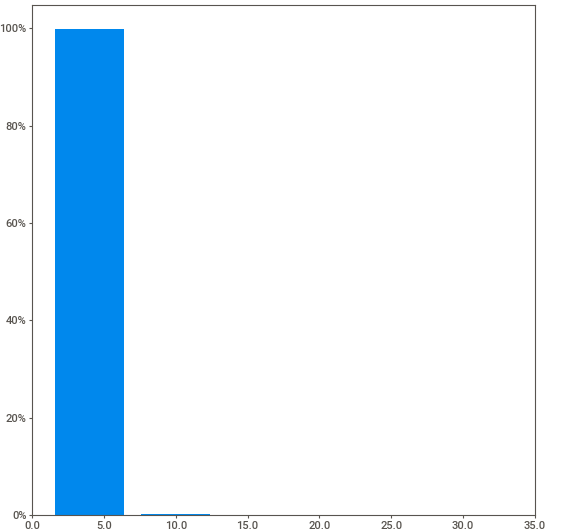
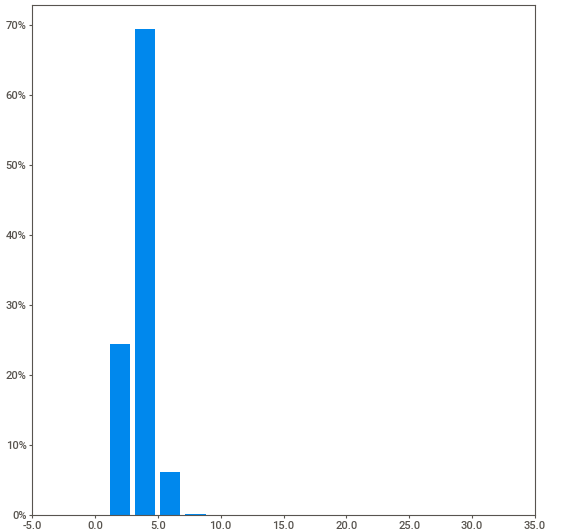
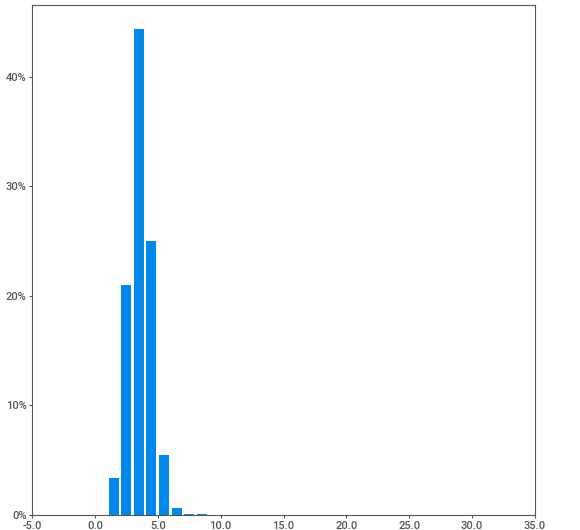
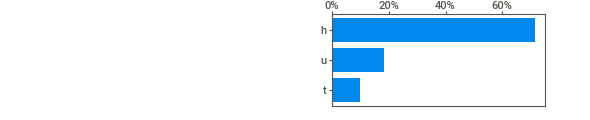
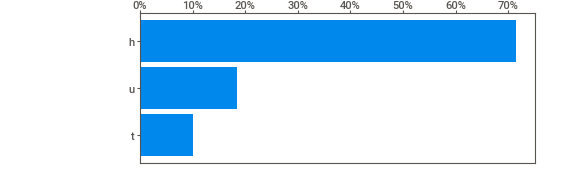
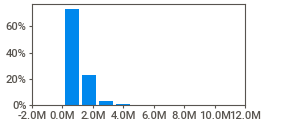
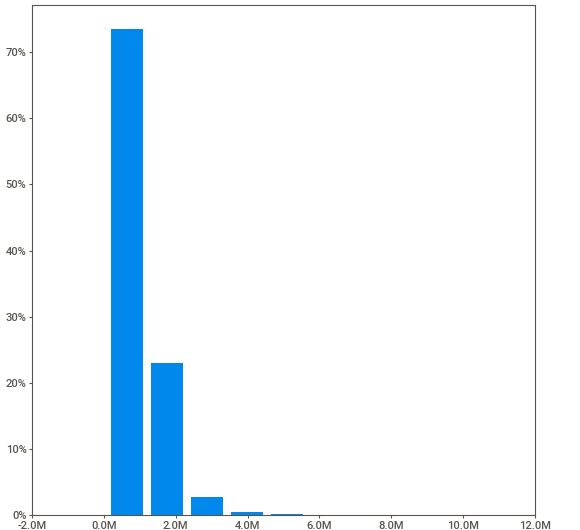
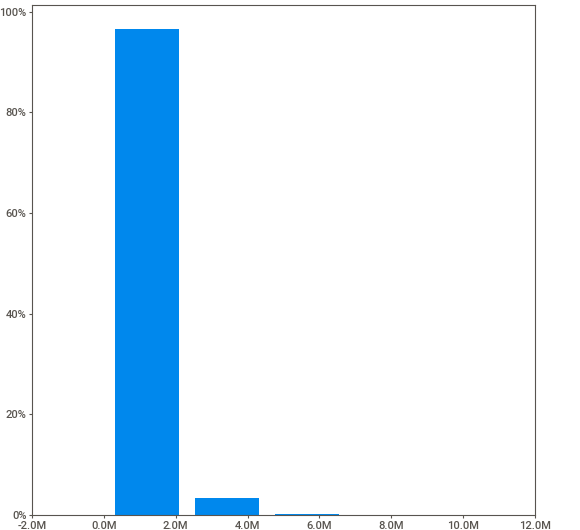
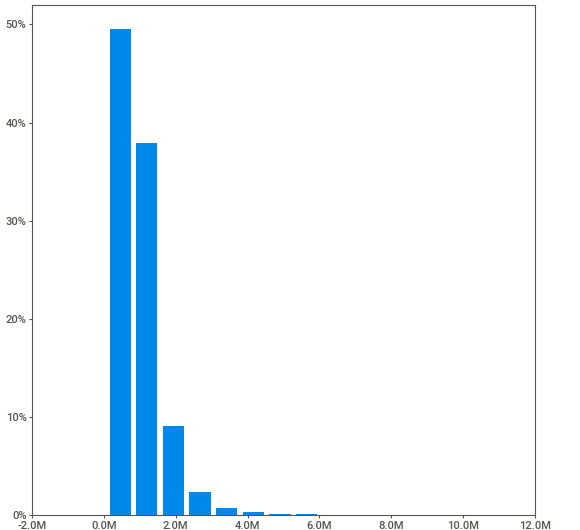
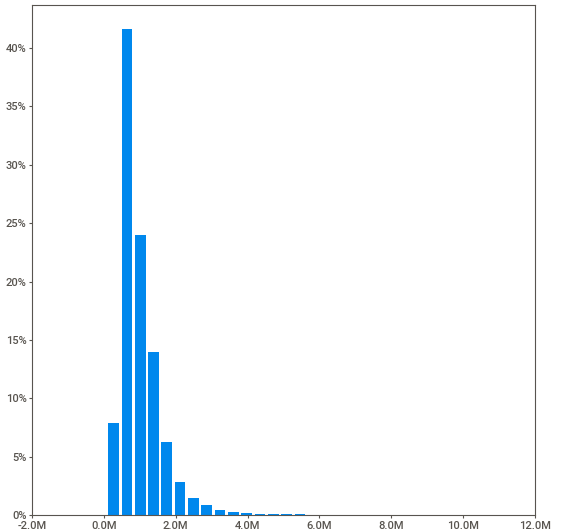
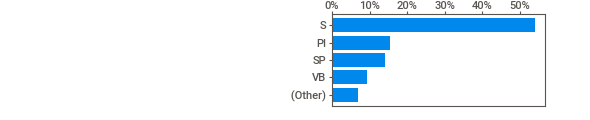
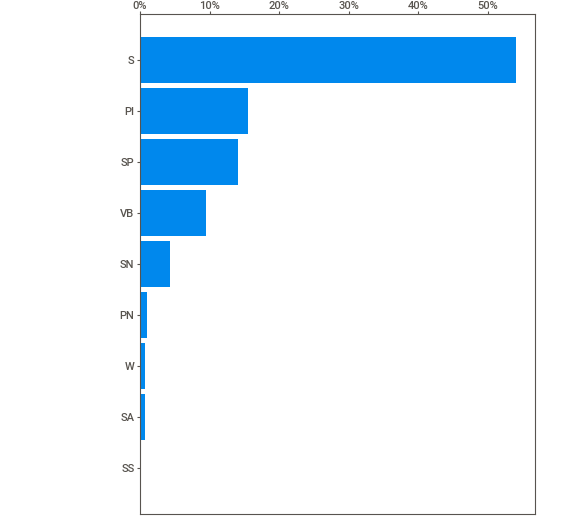
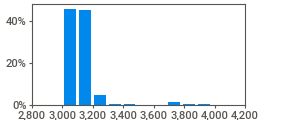
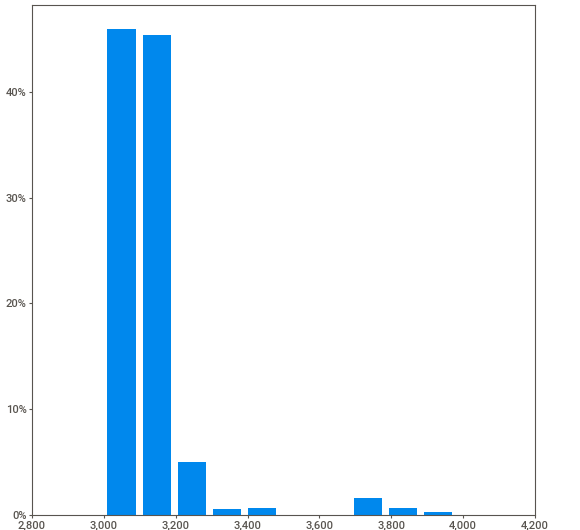
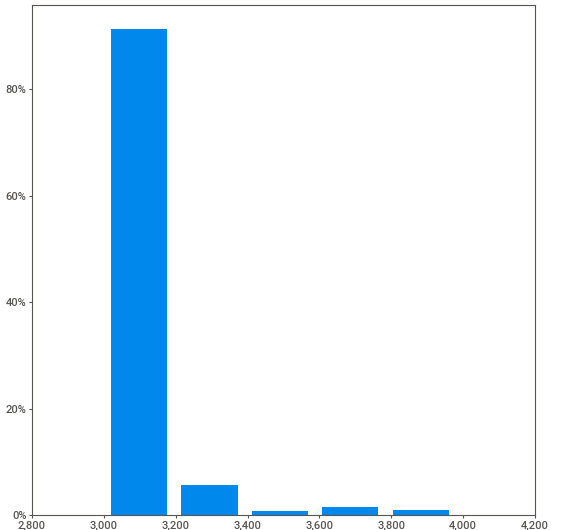
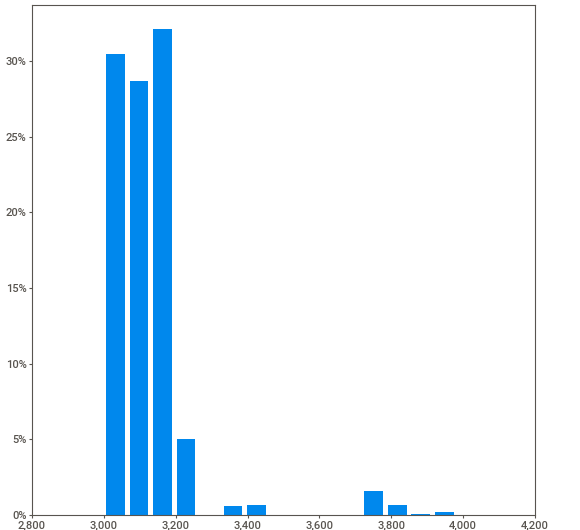
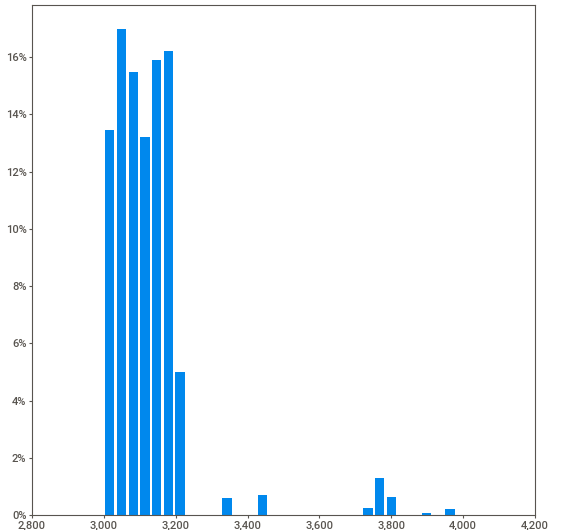
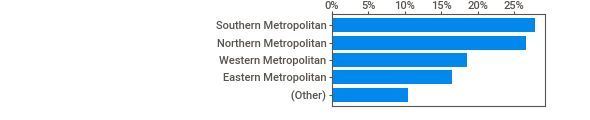
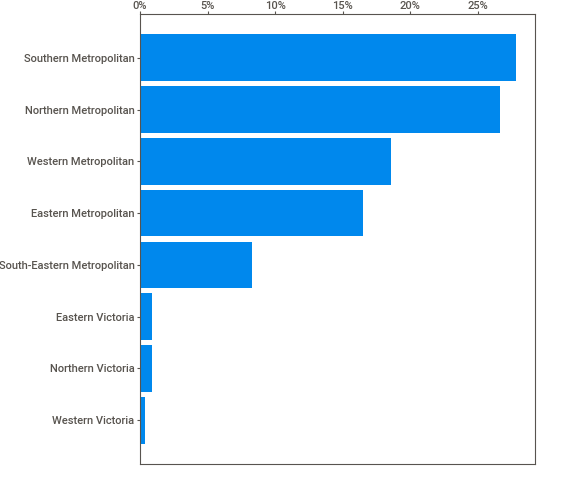
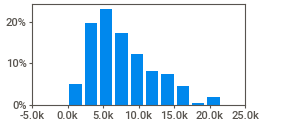
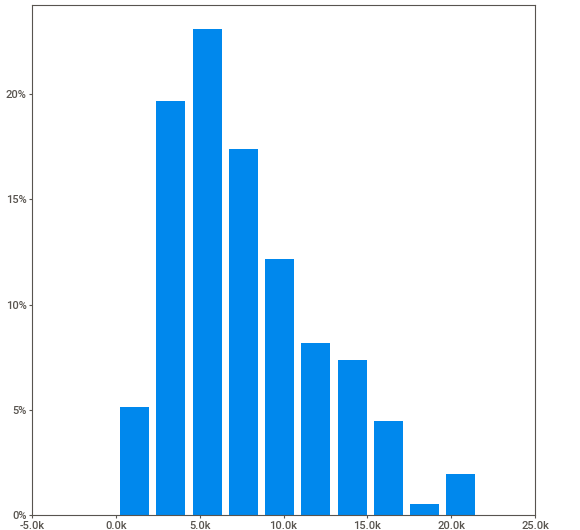
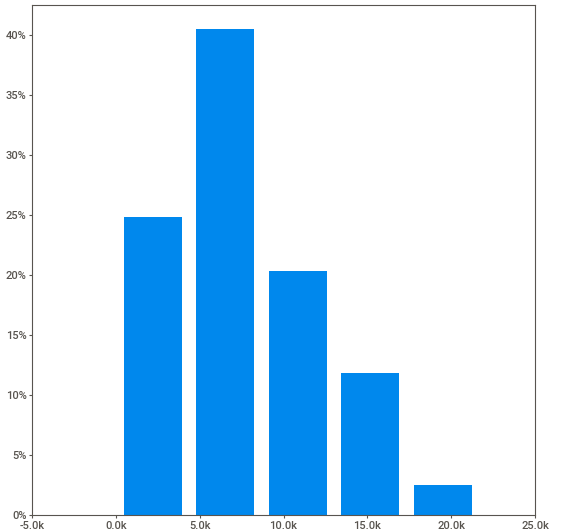
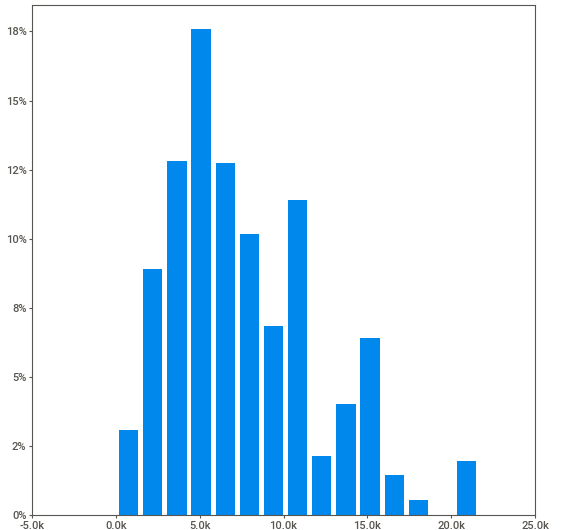
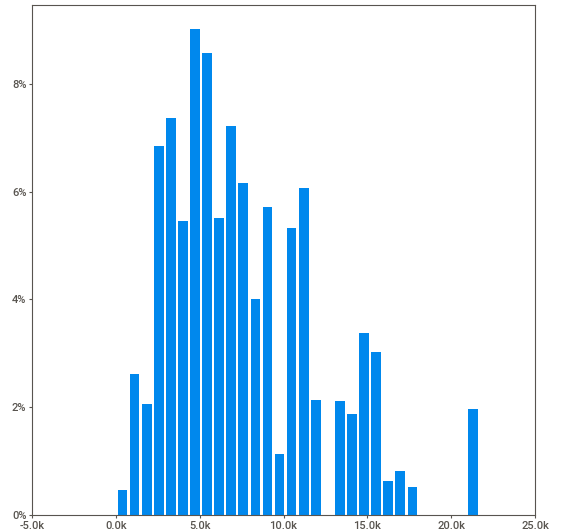
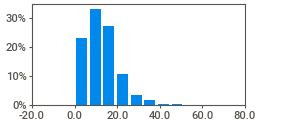
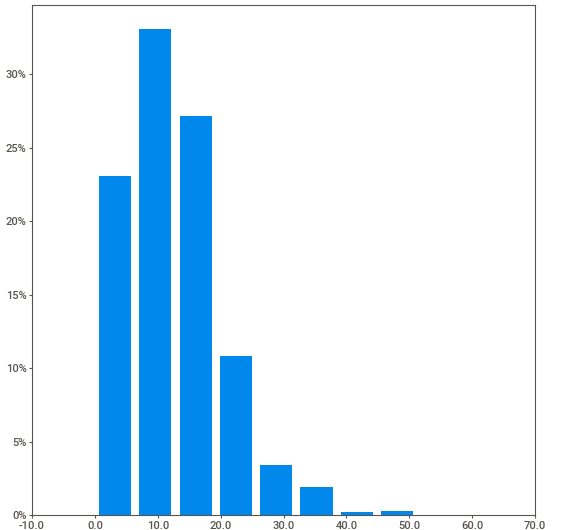
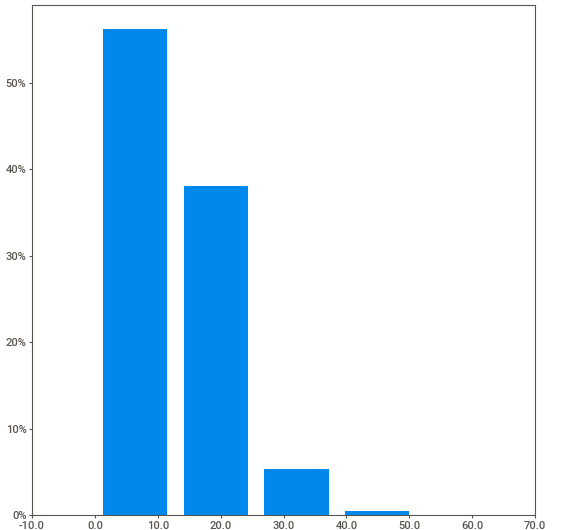
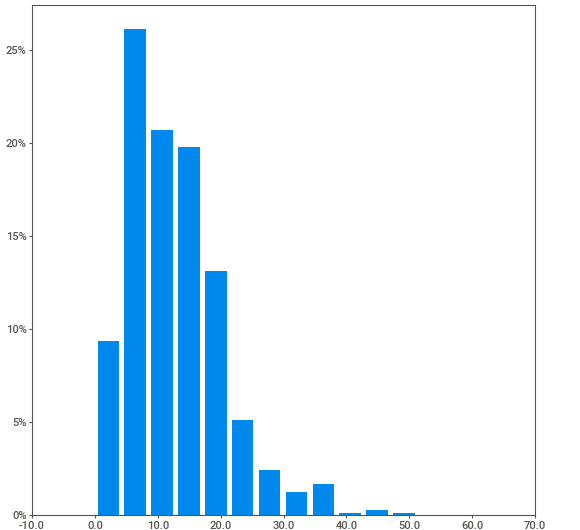
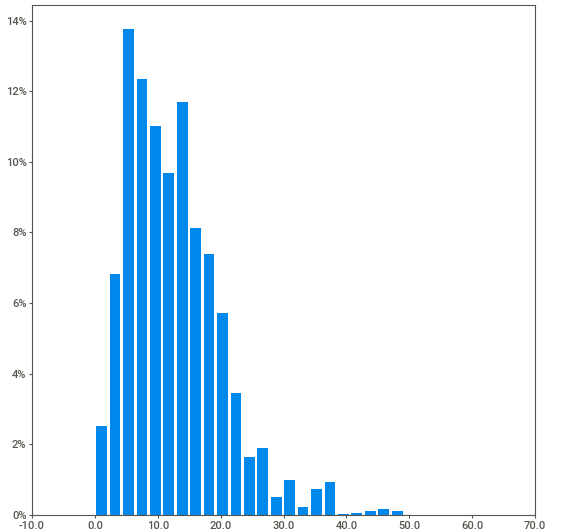
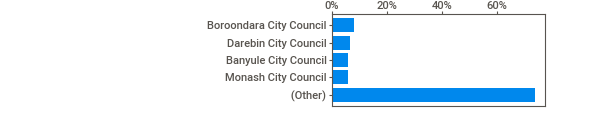
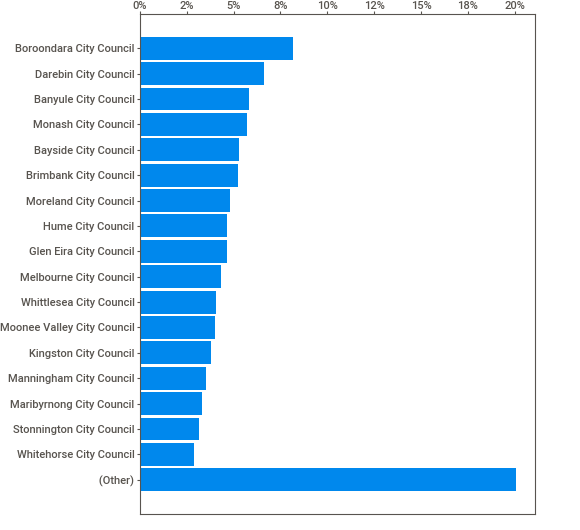
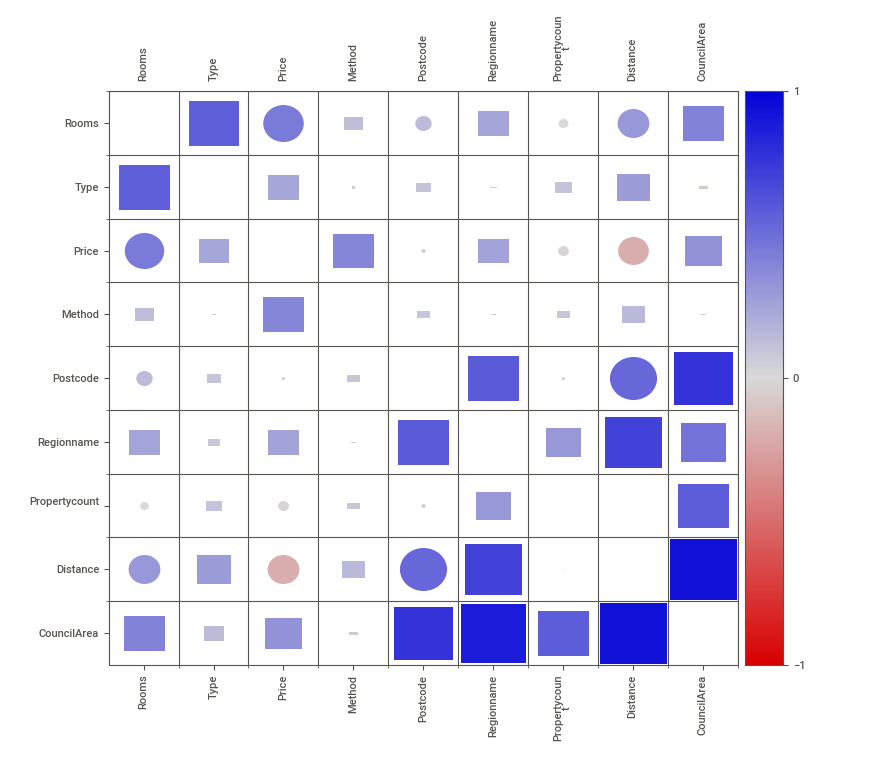
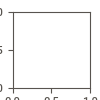

In [5]:
#complete analysis of dataset

report = sv.analyze(df)
report.show_notebook()

# Preprocessing of data

## Encoding the text values 

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
df['Suburb']=le.fit_transform(df['Suburb'])
df['Address']=le.fit_transform(df['Address'])
df['Type']=le.fit_transform(df['Type'])
df['Method']=le.fit_transform(df['Method'])
df['SellerG']=le.fit_transform(df['SellerG'])
df['Date']=le.fit_transform(df['Date'])
df['Regionname']=le.fit_transform(df['Regionname'])
df['CouncilArea']=le.fit_transform(df['CouncilArea'])

In [8]:
df=df.dropna()

                                             |          | [  0%]   00:00 -> (? left)


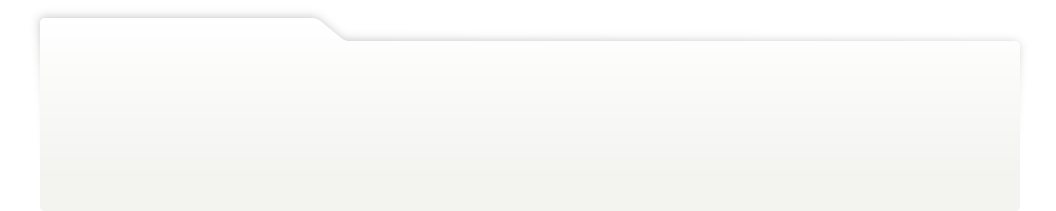
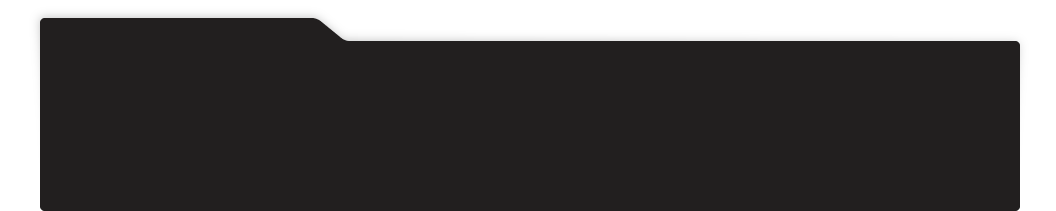
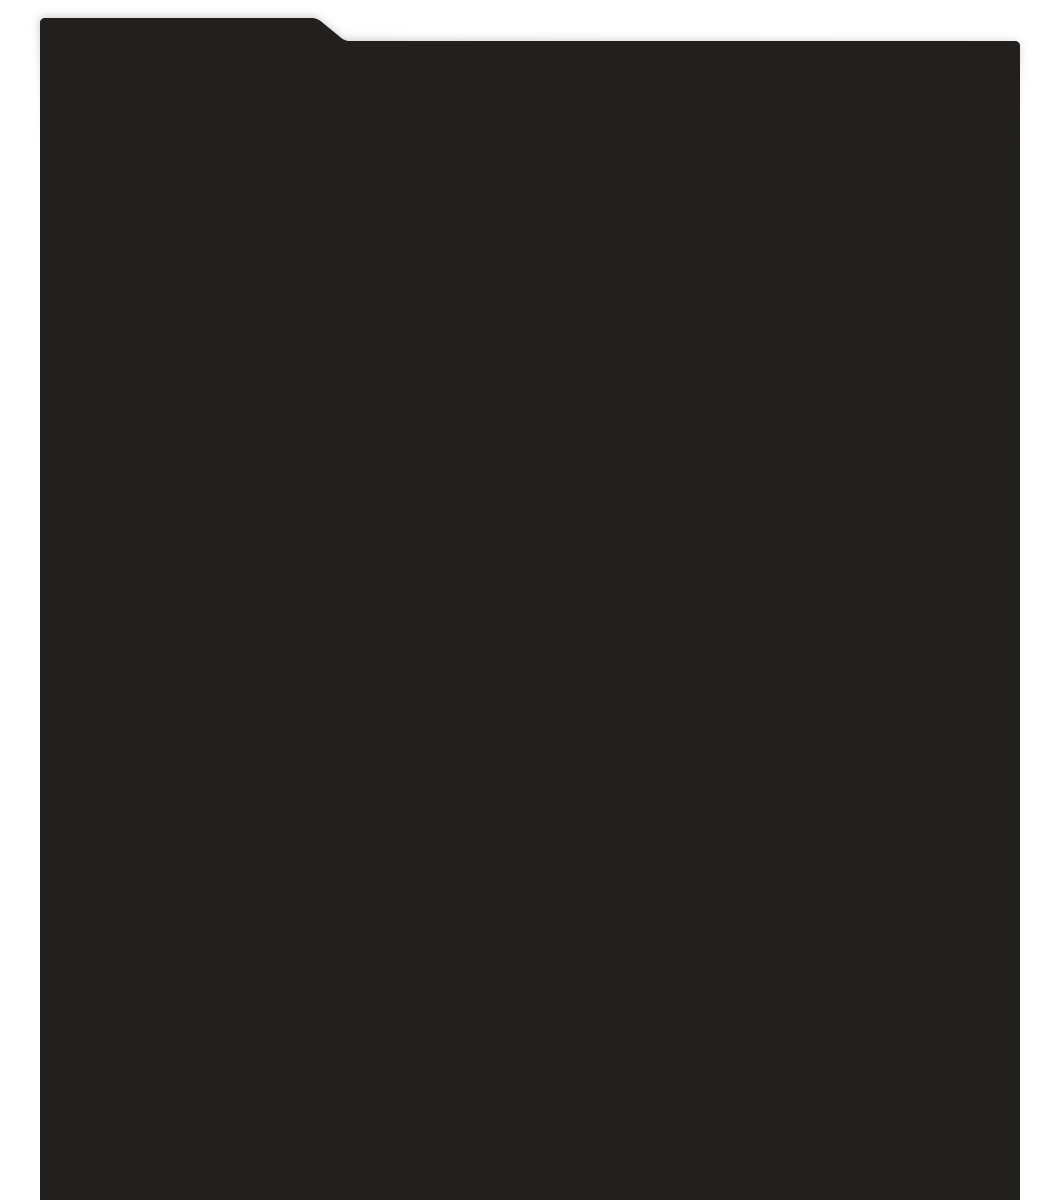
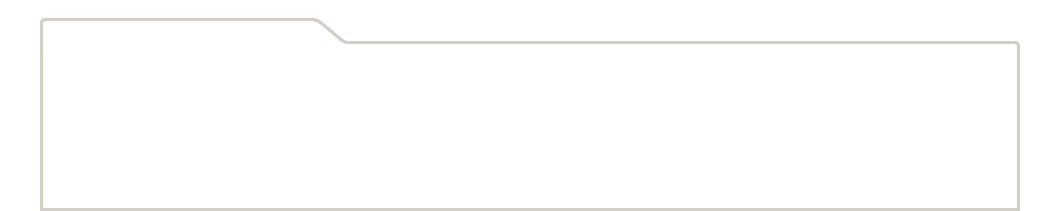
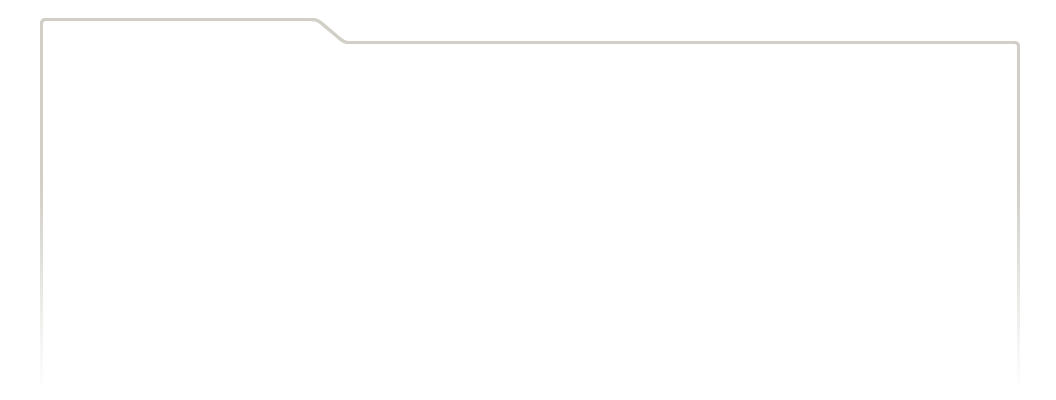
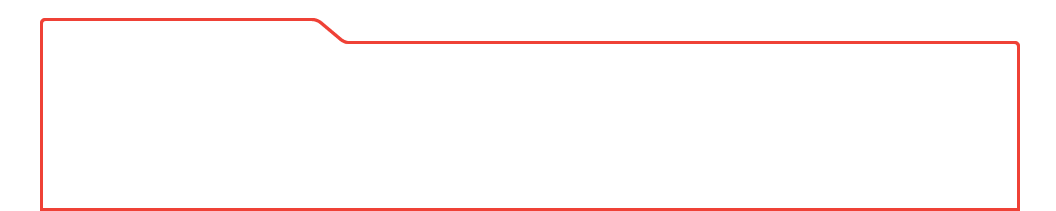
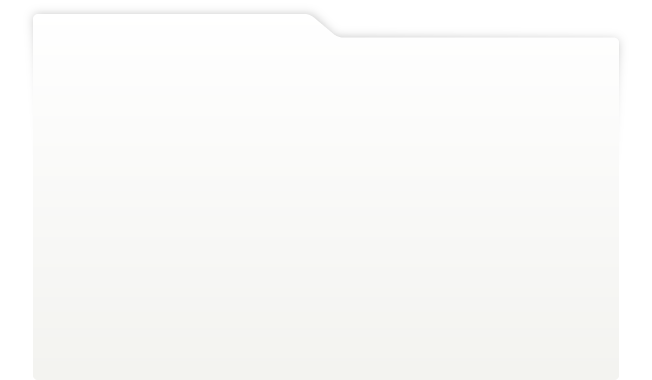
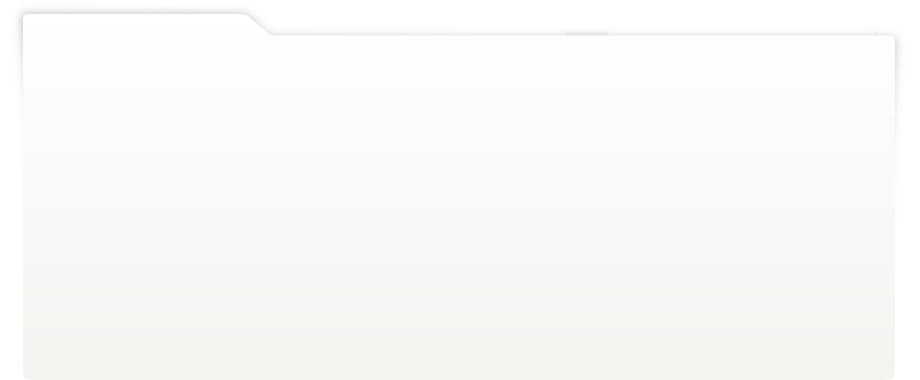
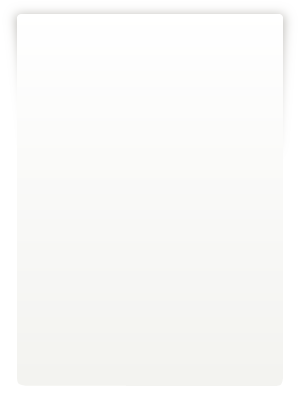
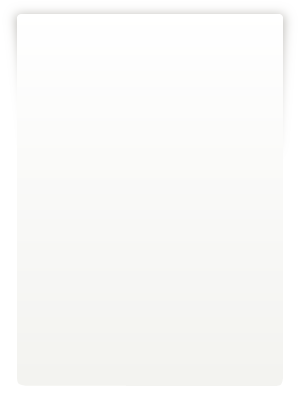
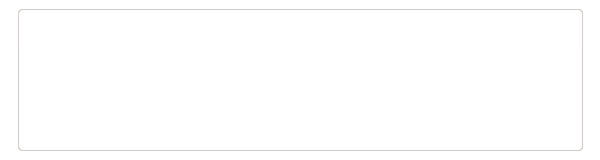
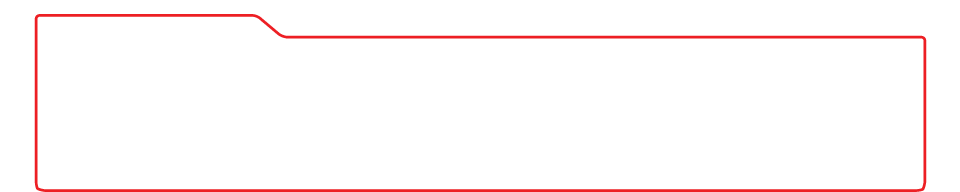
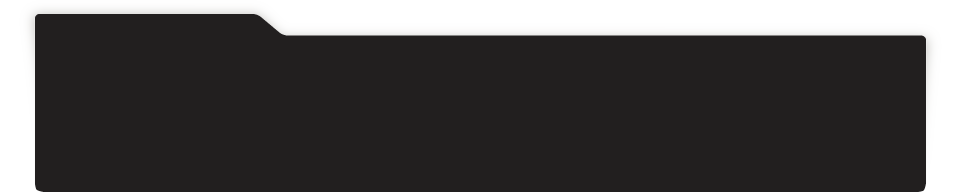
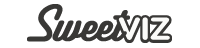
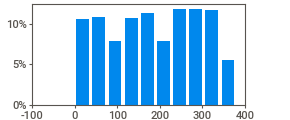
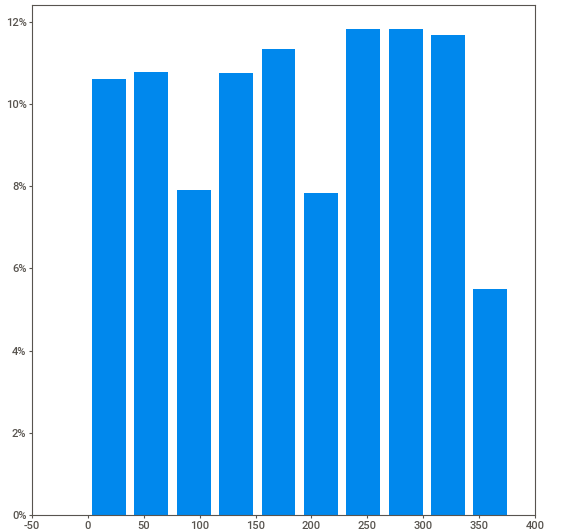
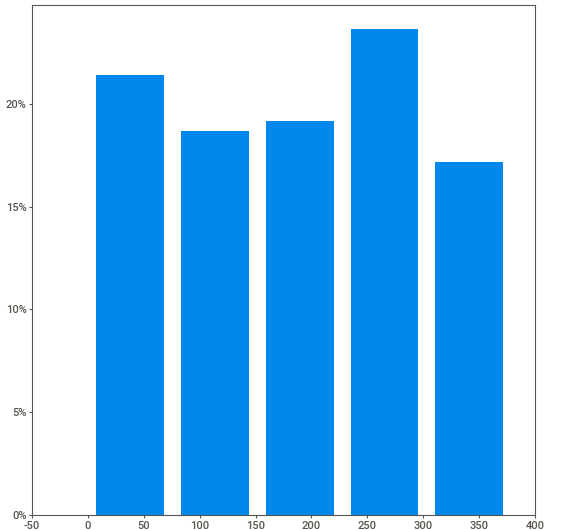
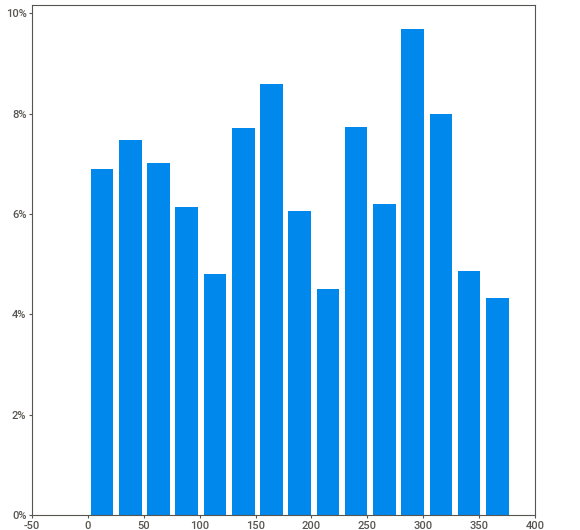
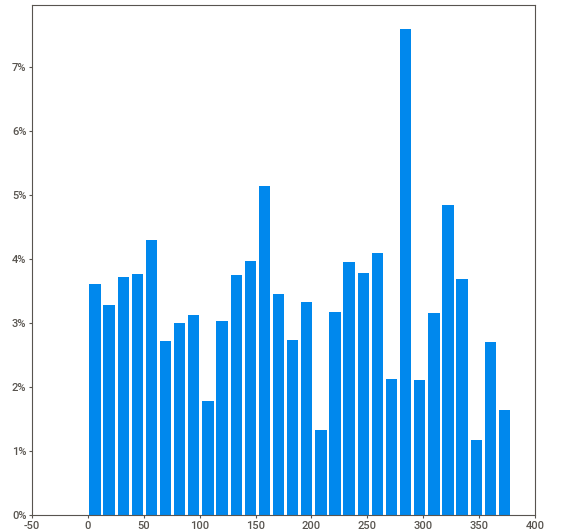
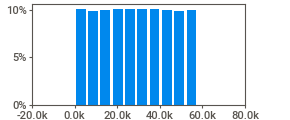
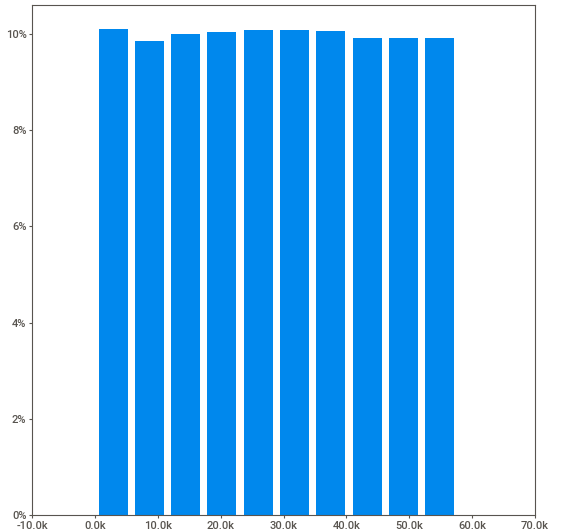
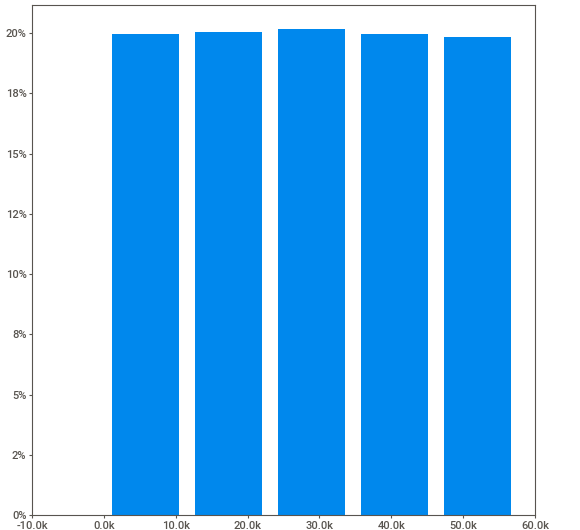
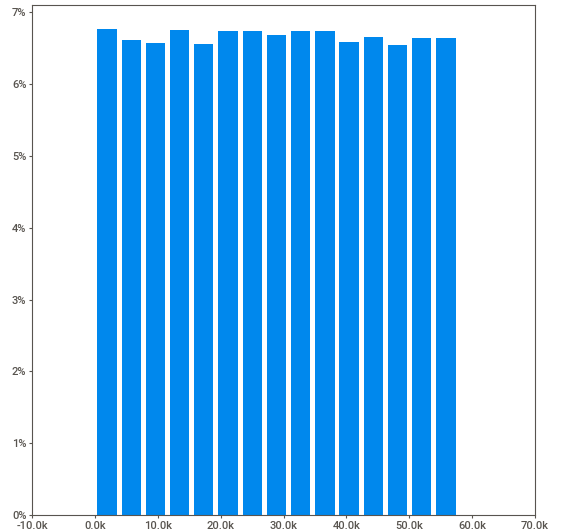
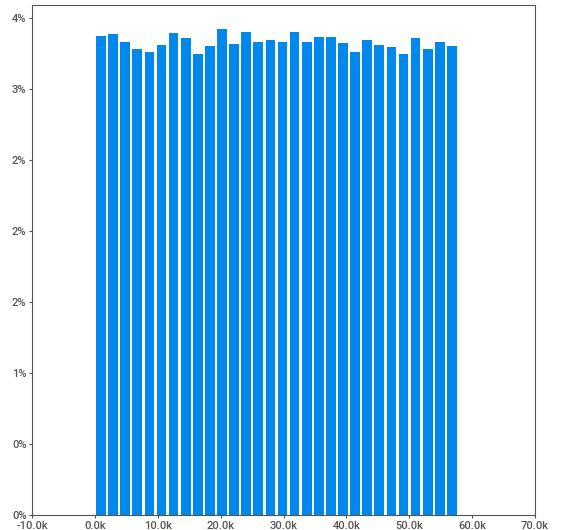
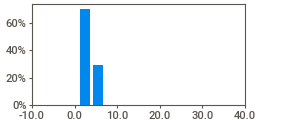
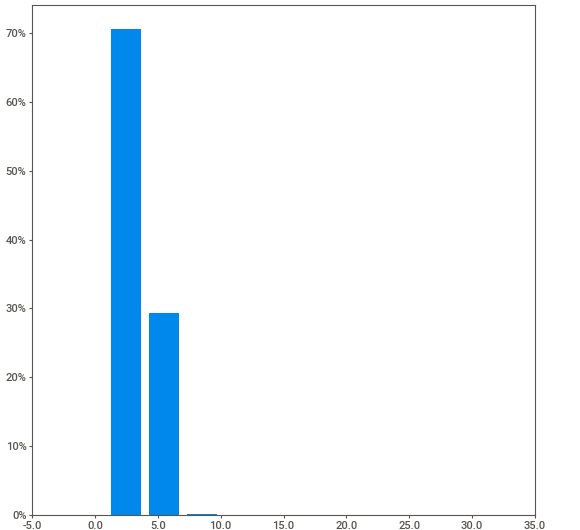
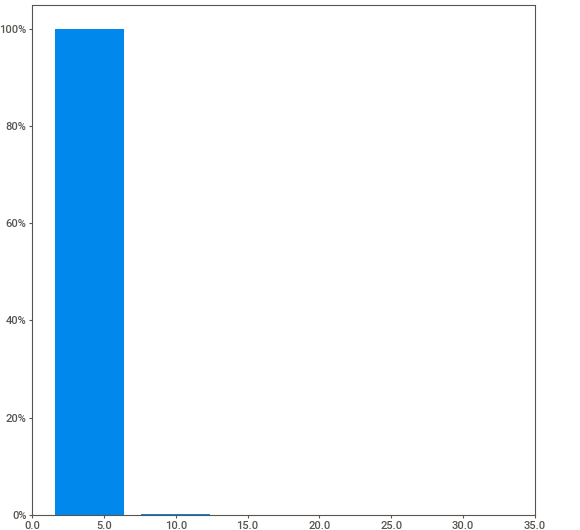
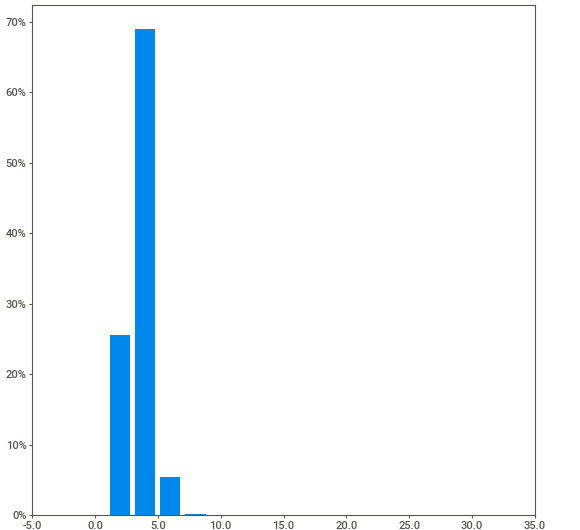
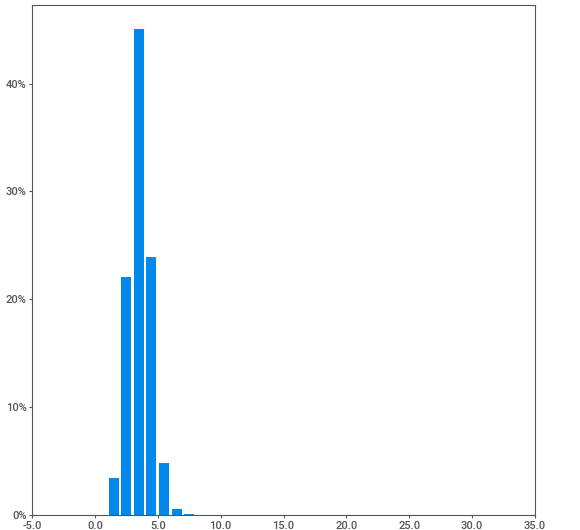
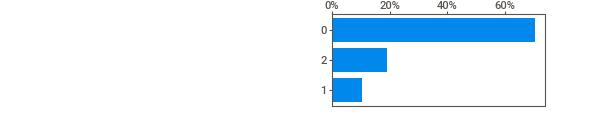
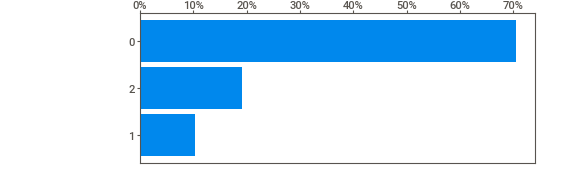
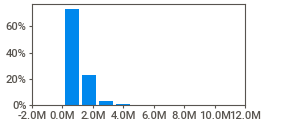
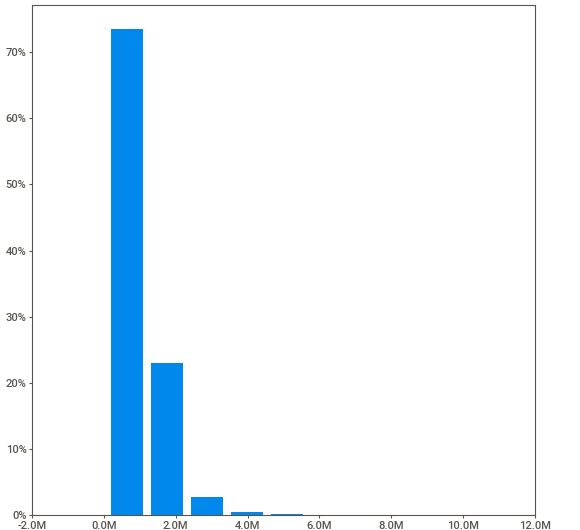
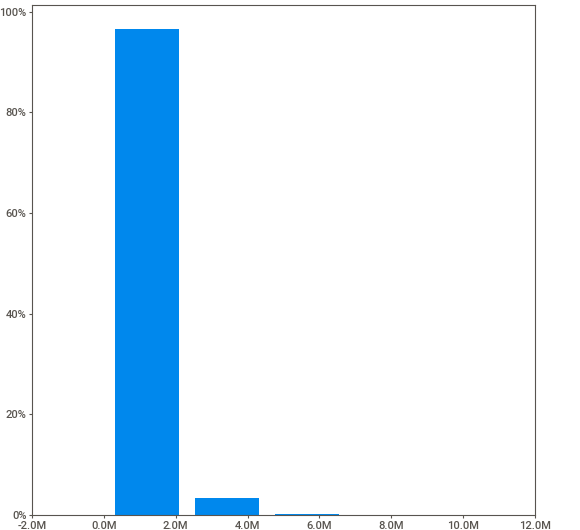
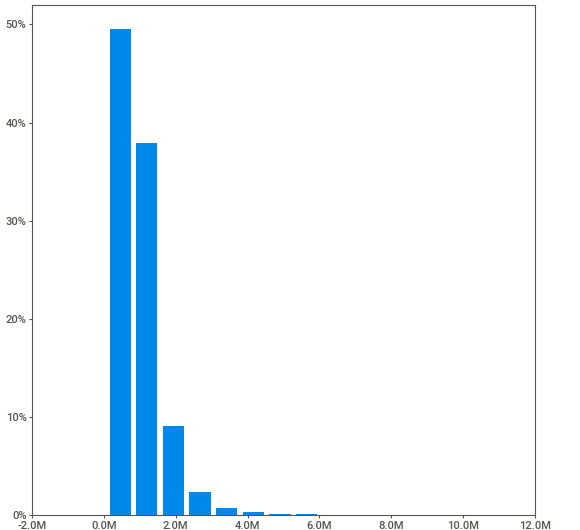
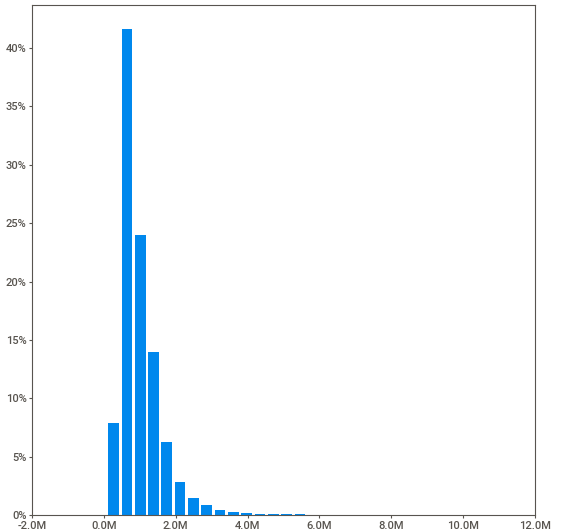
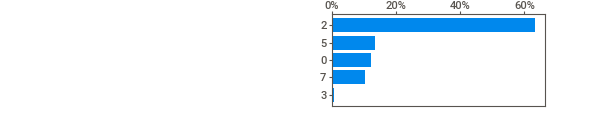
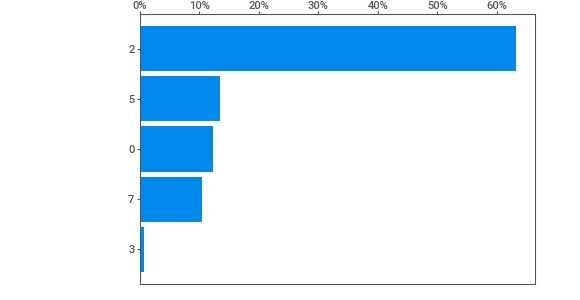
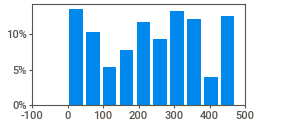
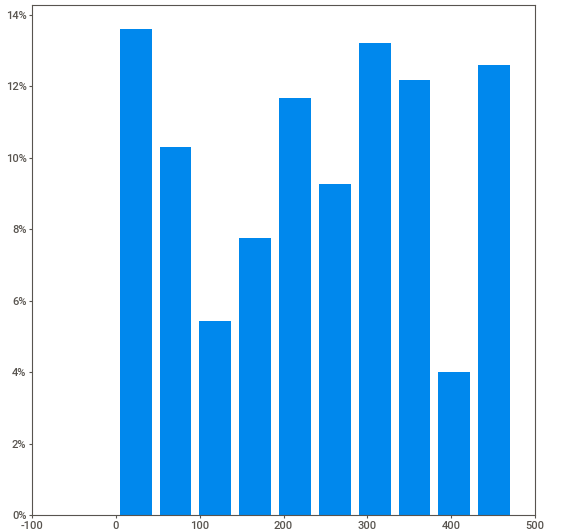
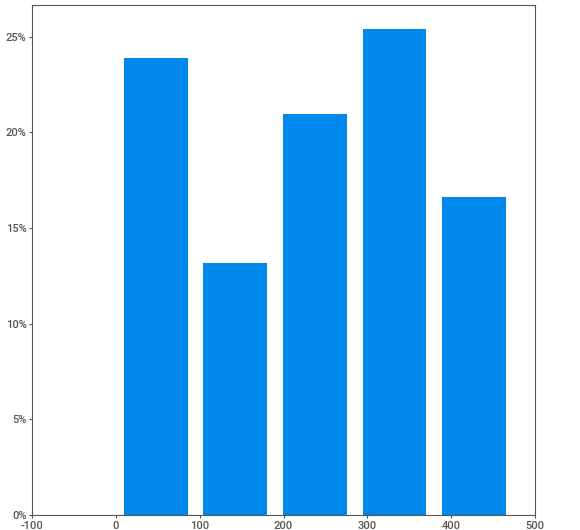
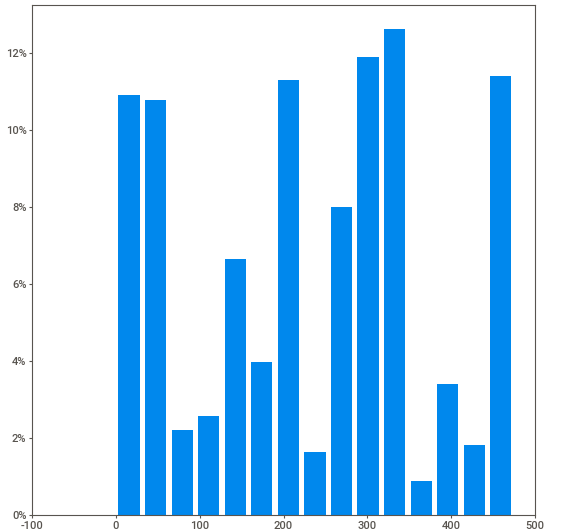
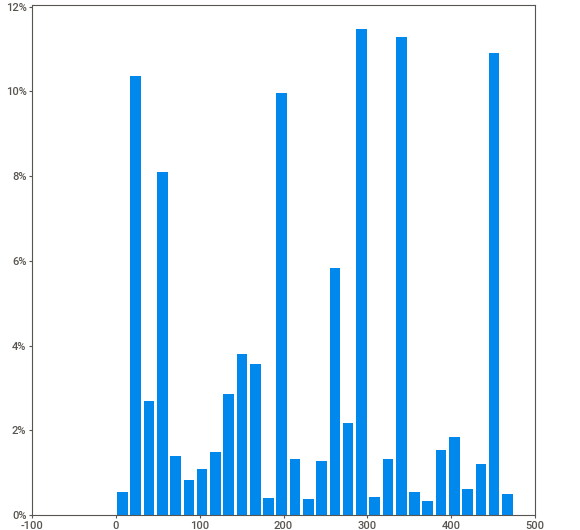
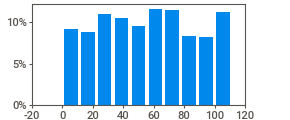
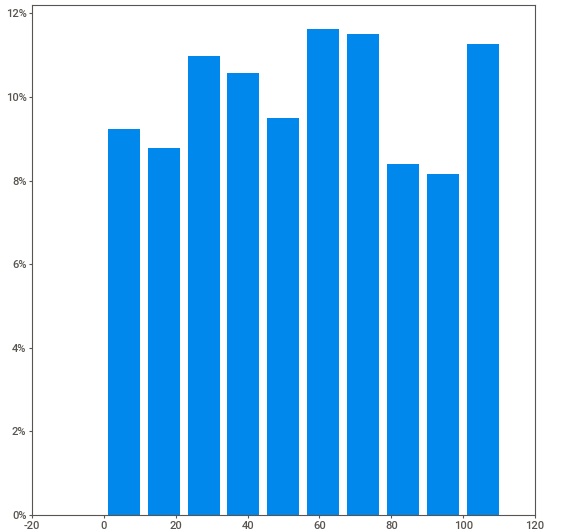
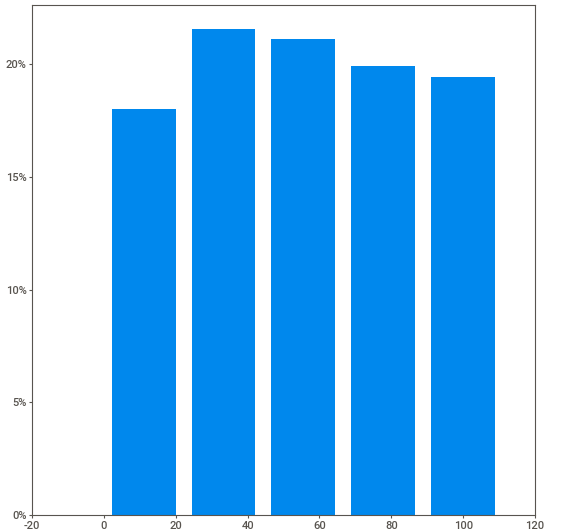
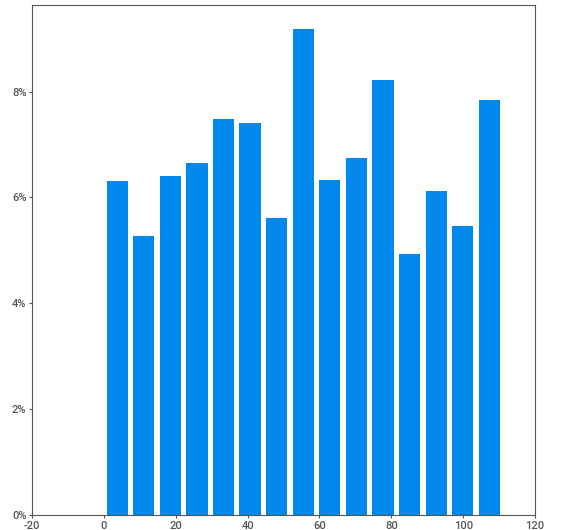
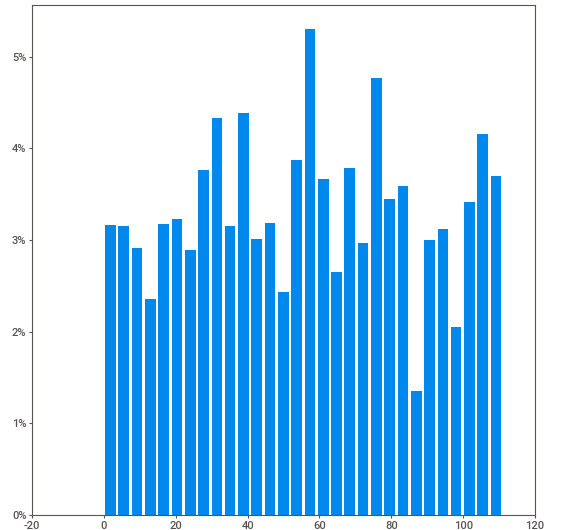
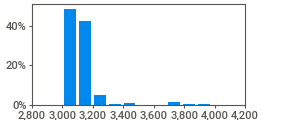
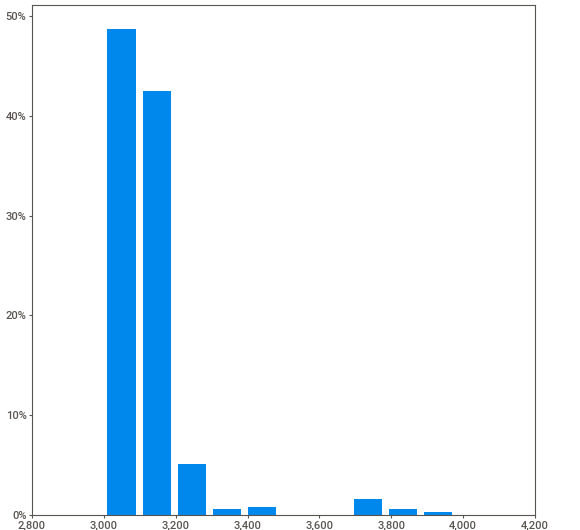
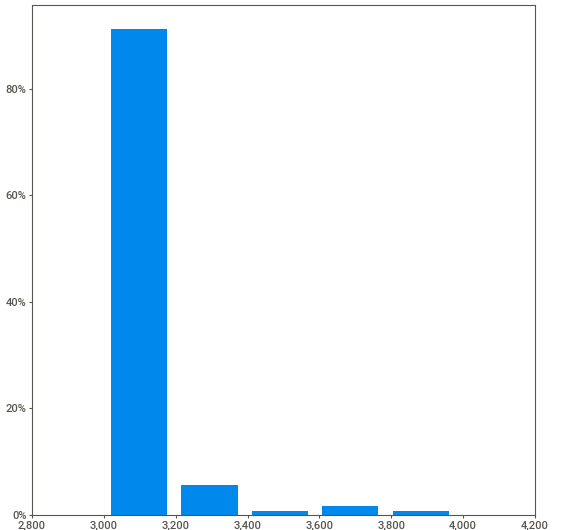
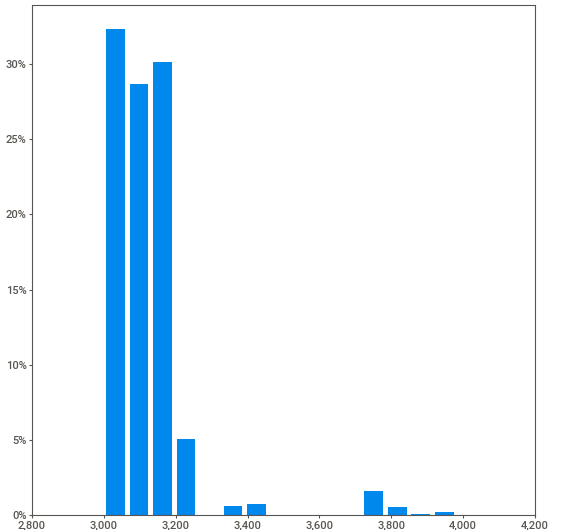
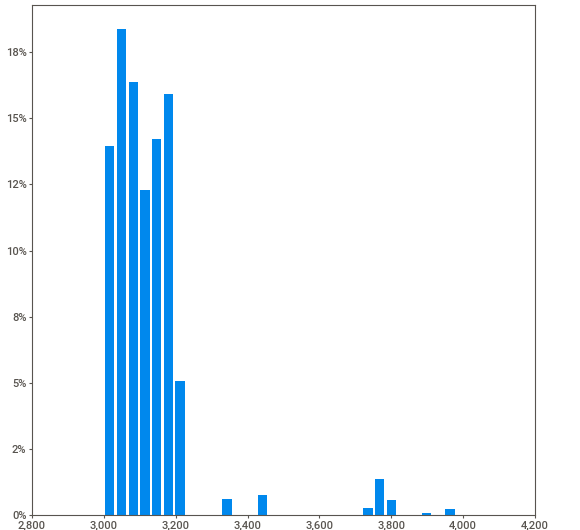
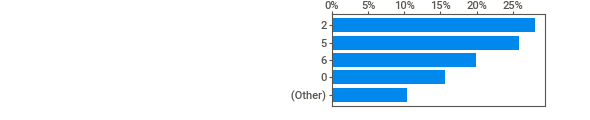
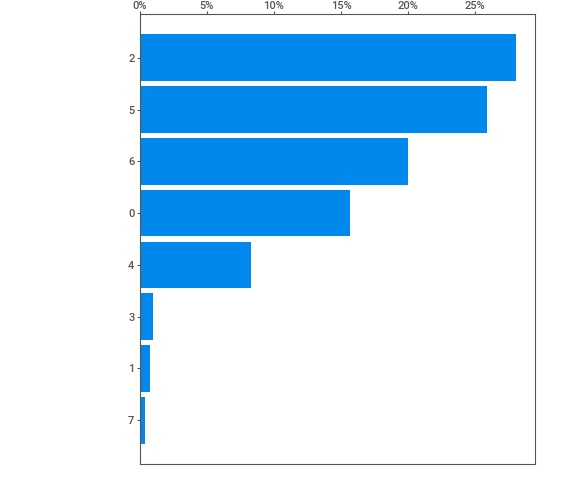
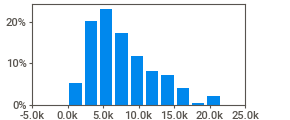
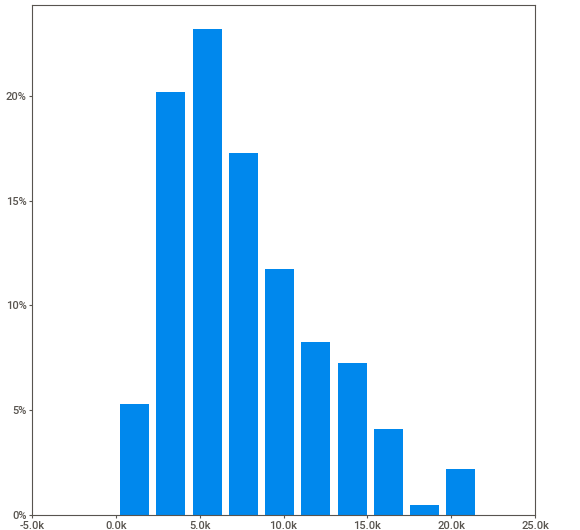
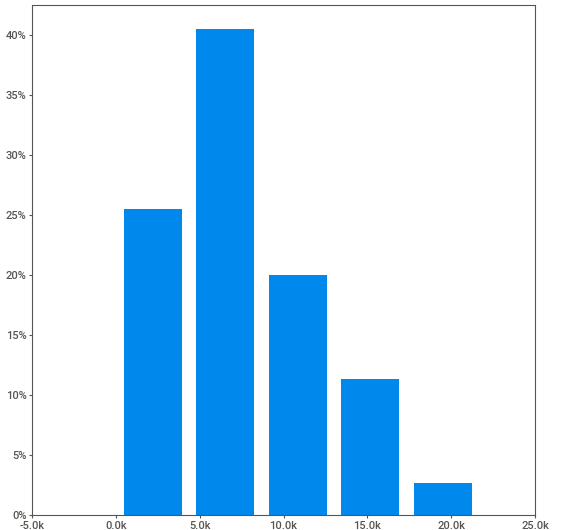
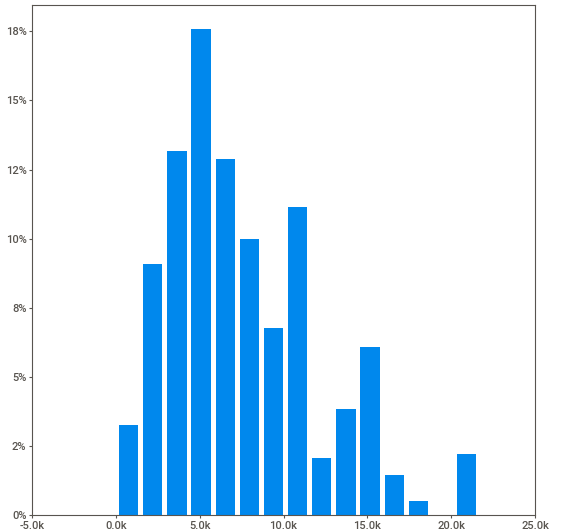
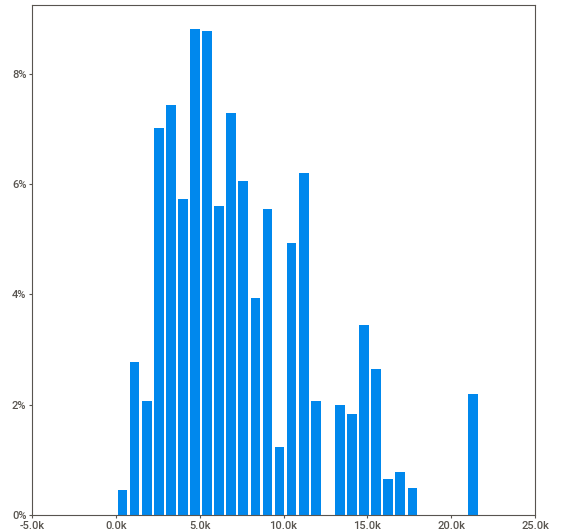
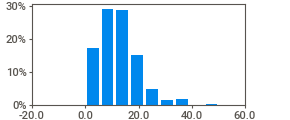
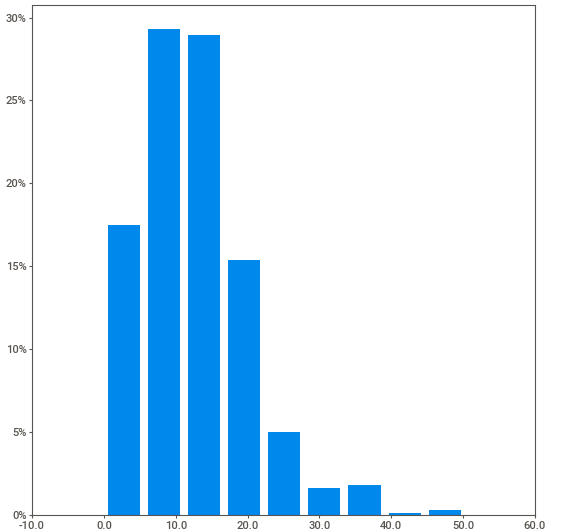
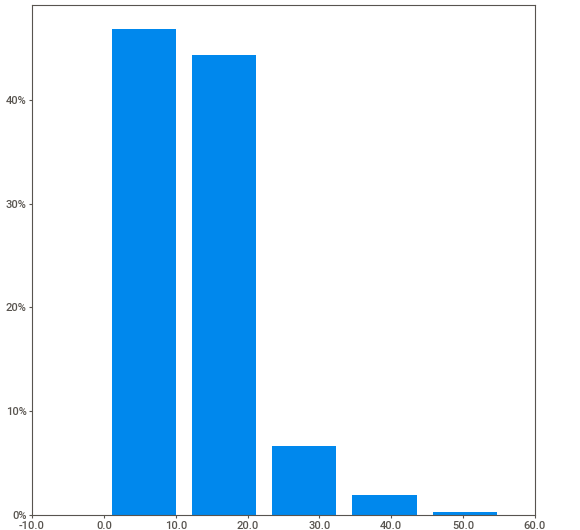
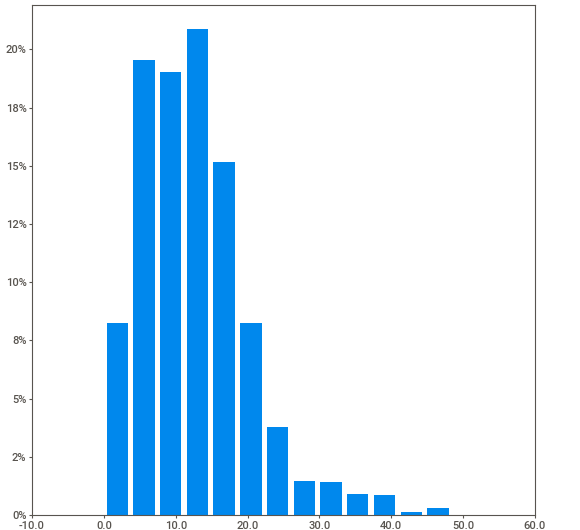
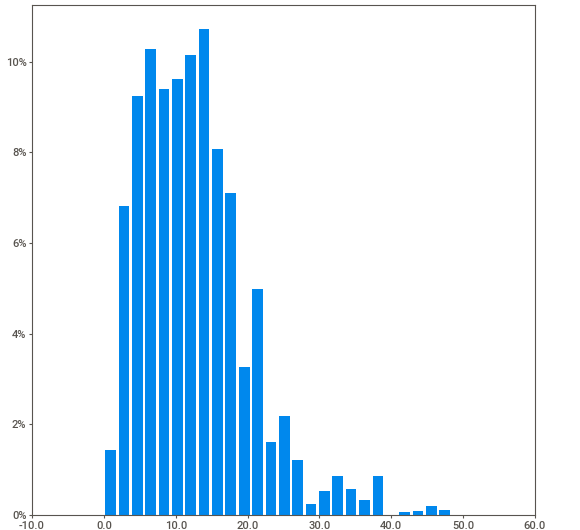
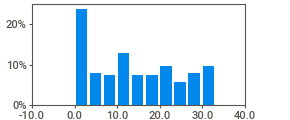
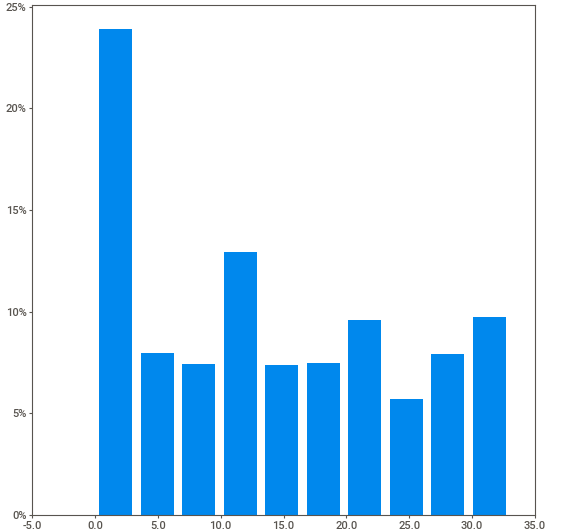
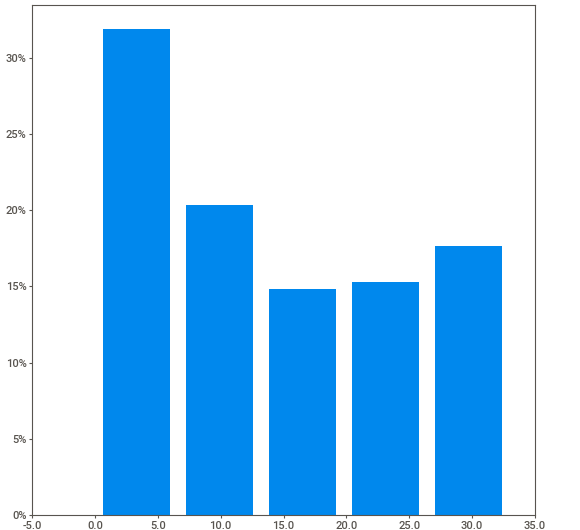
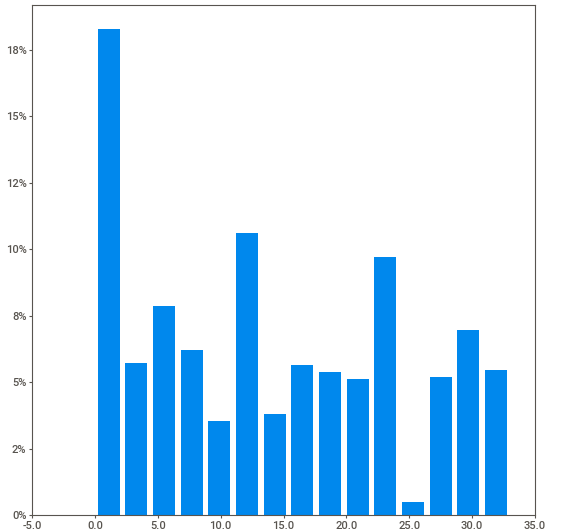
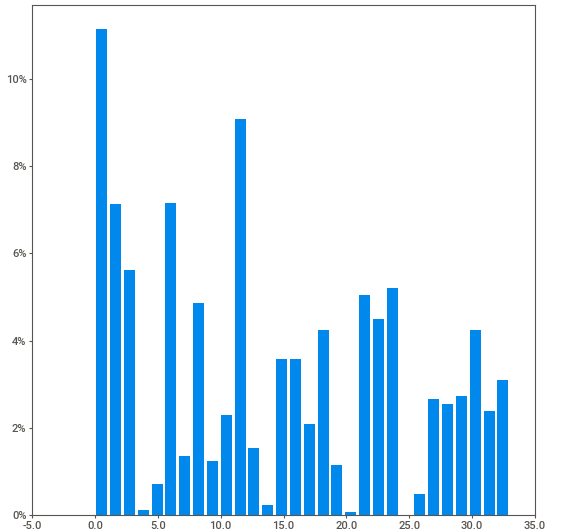
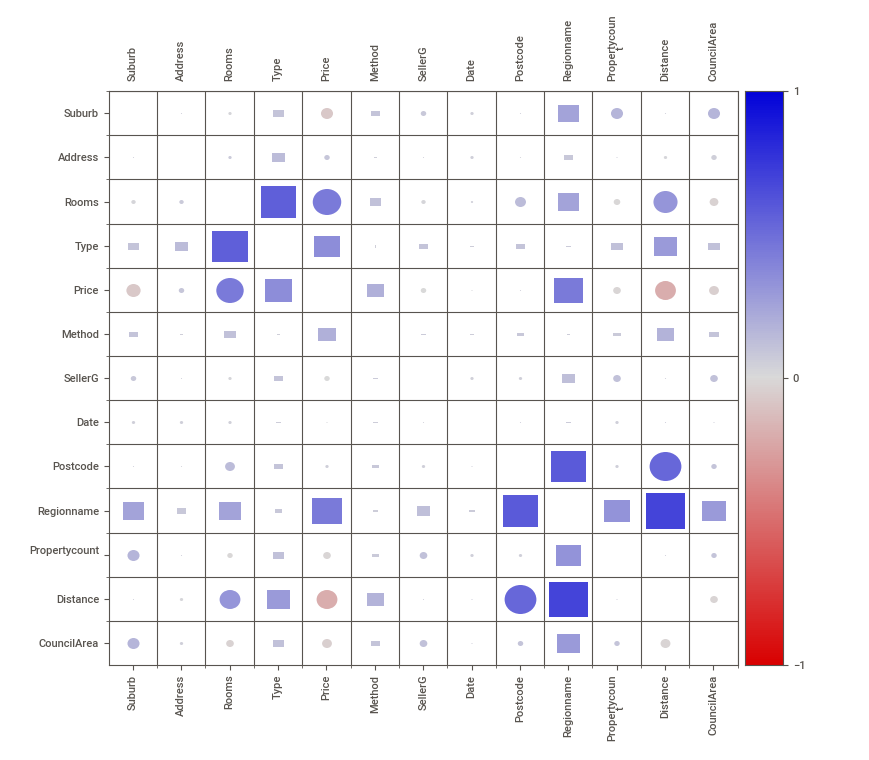
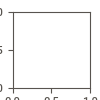

In [9]:
report = sv.analyze(df)
report.show_notebook()

### Heatmap for data 

<AxesSubplot:>

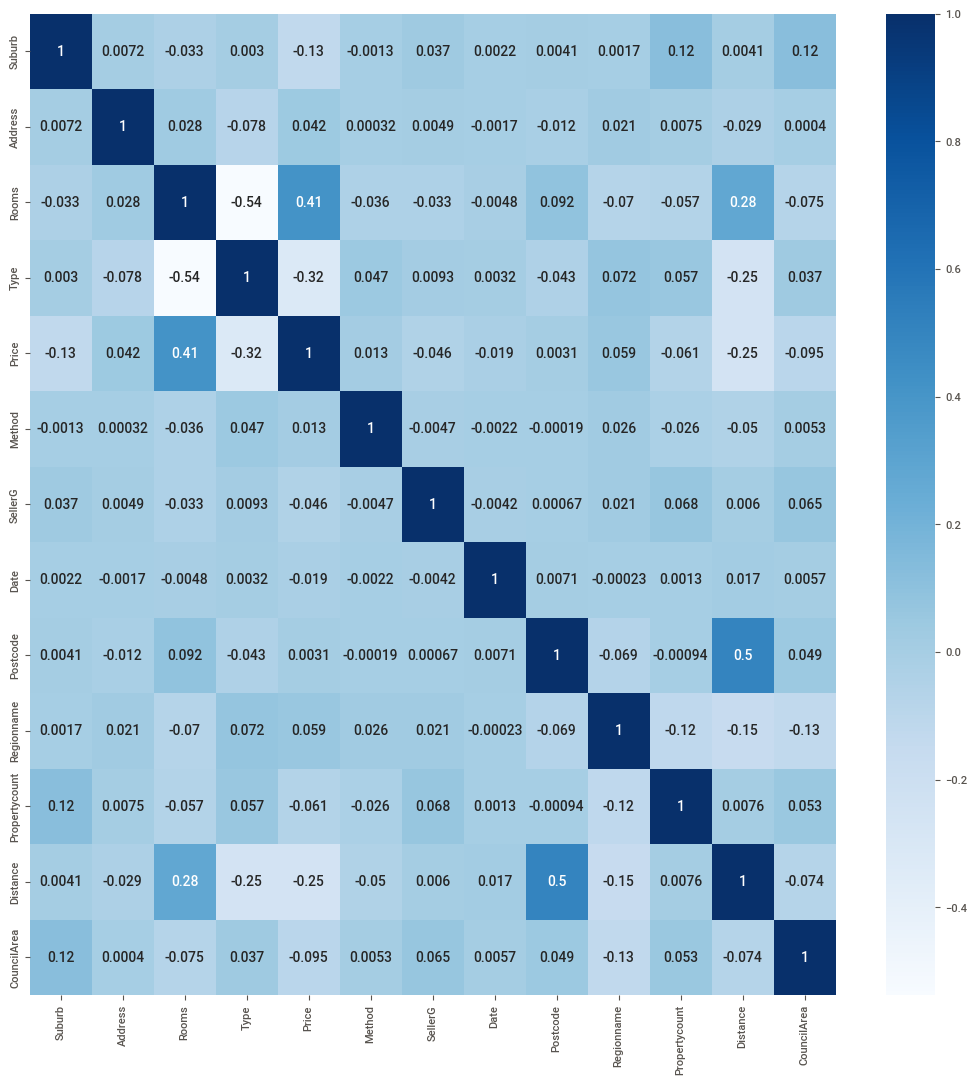

In [10]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

# Predict Model 

In [11]:
y = df['Price']
y.head(5)

0    1490000.0
1    1220000.0
2    1420000.0
3    1515000.0
4     670000.0
Name: Price, dtype: float64

In [12]:
X=df.drop(labels=['Price'],axis=1,inplace=False)
X.head(5)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,0,42390,3,0,2,198,0,3067,2,4019,3.0,32
1,0,46855,3,0,2,255,0,3067,2,4019,3.0,32
2,0,8180,3,0,2,286,0,3067,2,4019,3.0,32
3,1,50133,3,0,2,28,0,3040,6,1543,7.5,22
4,2,57182,2,0,2,286,0,3042,6,3464,10.4,22


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)


### Importing required models

##### Checking model before at raw preprocessed data 

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [15]:
lr.fit(X_train,y_train)
dtr.fit(X_train,y_train)
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [16]:
#prediction by linear Regression
y_pred = lr.predict(X_test)
print("Accuracy by linear regression : {}".format(r2_score(y_test,y_pred)))

#prediction by Decision Tree
y_pred = dtr.predict(X_test)
print("Accuracy by Decision Tree : {}".format(r2_score(y_test,y_pred)))

#prediction by Random Forest
y_pred = rfr.predict(X_test)
print("Accuracy by Random Forest : {}".format(r2_score(y_test,y_pred)))

Accuracy by linear regression : 0.4135979879377971
Accuracy by Decision Tree : 0.4856526518477128
Accuracy by Random Forest : 0.7149929374764016


#### Check for the properties required to include and exclude

In [17]:
y=df['Price']
X=df.drop(labels=['Price','Postcode','SellerG','Propertycount','Regionname','CouncilArea'],axis=1,inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [18]:
lr.fit(X_train,y_train)
dtr.fit(X_train,y_train)
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
#prediction by linear Regression
y_pred = lr.predict(X_test)
print("Accuracy by linear regression : {}".format(r2_score(y_test,y_pred)))

#prediction by Decision Tree
y_pred = dtr.predict(X_test)
print("Accuracy by Decision Tree : {}".format(r2_score(y_test,y_pred)))

#prediction by Random Forest
y_pred = rfr.predict(X_test)
print("Accuracy by Random Forest : {}".format(r2_score(y_test,y_pred)))

Accuracy by linear regression : 0.3602697269057915
Accuracy by Decision Tree : 0.48267718924023106
Accuracy by Random Forest : 0.7042330152047498
